In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Get data file names
path =r'C:\Users\user\Desktop\internship_fliprobo\Flight-Price-Prediction\webscrapped_data'
files = glob.glob(path + "/*.csv")
df = []
for filename in files:
    df.append(pd.read_csv(filename))
#Concatenate all data into one DataFrame
Flight_price = pd.concat(df, ignore_index=True)

In [3]:
Flight_price

,Unnamed: 0,Airline_Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
0,0,SpiceJet,Delhi,Mumbai,06:20,08:40,02h 20m,non-stop,"5,955"
1,1,SpiceJet,Delhi,Mumbai,20:30,22:50,02h 20m,non-stop,"5,955"
2,2,GO FIRST,Delhi,Mumbai,08:00,10:10,02h 10m,non-stop,"5,954"
3,3,GO FIRST,Delhi,Mumbai,14:20,16:35,02h 15m,non-stop,"5,954"
4,4,GO FIRST,Delhi,Mumbai,21:00,23:15,02h 15m,non-stop,"5,954"
...,...,...,...,...,...,...,...,...,...
2073,406,Air India,New Delhi,Hyderabad,17:50,21:35 + 1 day,27h 45m,2 Stop(s),"9,840"
2074,407,Vistara,New Delhi,Hyderabad,09:30,12:15 + 1 day,26h 45m,2 Stop(s),"9,945"
2075,408,Air India,New Delhi,Hyderabad,08:40,21:35 + 1 day,36h 55m,2 Stop(s),"10,474"
2076,409,Air India,New Delhi,Hyderabad,05:55,21:35 + 1 day,39h 40m,2 Stop(s),"10,474"


In [4]:
Flight_price.shape

(2078, 9)

In [5]:
Flight_price.head(10)

,Unnamed: 0,Airline_Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
0,0,SpiceJet,Delhi,Mumbai,06:20,08:40,02h 20m,non-stop,"5,955"
1,1,SpiceJet,Delhi,Mumbai,20:30,22:50,02h 20m,non-stop,"5,955"
2,2,GO FIRST,Delhi,Mumbai,08:00,10:10,02h 10m,non-stop,"5,954"
3,3,GO FIRST,Delhi,Mumbai,14:20,16:35,02h 15m,non-stop,"5,954"
4,4,GO FIRST,Delhi,Mumbai,21:00,23:15,02h 15m,non-stop,"5,954"
5,5,Vistara,Delhi,Mumbai,14:20,16:30,02h 10m,non-stop,"5,955"
6,6,Vistara,Delhi,Mumbai,15:30,17:40,02h 10m,non-stop,"5,955"
7,7,Vistara,Delhi,Mumbai,17:45,20:05,02h 20m,non-stop,"5,955"
8,8,Vistara,Delhi,Mumbai,12:50,15:00,02h 10m,non-stop,"6,060"
9,9,Indigo,Delhi,Mumbai,17:15,19:25,02h 10m,non-stop,"5,955"


In [6]:
Flight_price.tail(10)

,Unnamed: 0,Airline_Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
2068,401,Vistara,New Delhi,Hyderabad,15:30,12:15 + 1 day,20h 45m,2 Stop(s),"9,840"
2069,402,Vistara,New Delhi,Hyderabad,14:20,12:15 + 1 day,21h 55m,2 Stop(s),"9,840"
2070,403,Air India,New Delhi,Hyderabad,20:00,21:35 + 1 day,25h 35m,2 Stop(s),"9,840"
2071,404,Air India,New Delhi,Hyderabad,19:00,21:35 + 1 day,26h 35m,2 Stop(s),"9,840"
2072,405,Vistara,New Delhi,Hyderabad,17:45,20:55 + 1 day,27h 10m,2 Stop(s),"9,840"
2073,406,Air India,New Delhi,Hyderabad,17:50,21:35 + 1 day,27h 45m,2 Stop(s),"9,840"
2074,407,Vistara,New Delhi,Hyderabad,09:30,12:15 + 1 day,26h 45m,2 Stop(s),"9,945"
2075,408,Air India,New Delhi,Hyderabad,08:40,21:35 + 1 day,36h 55m,2 Stop(s),"10,474"
2076,409,Air India,New Delhi,Hyderabad,05:55,21:35 + 1 day,39h 40m,2 Stop(s),"10,474"
2077,410,Vistara,New Delhi,Hyderabad,21:40,12:15 + 1 day,14h 35m,2 Stop(s),"10,575"


In [7]:
Flight_price.sample(10)

,Unnamed: 0,Airline_Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
1492,210,Emirates,DEL,HYD,10:35 AM,8:25 AM+1,NaN,1 stop,"₹34,125"
1366,84,Vistara,DEL,HYD,9:40 PM,7:50 AM+1,NaN,1 stop,"₹4,143"
2041,374,Air India,New Delhi,Hyderabad,21:25,23:35,2h 10m,3 Stop(s),"5,955"
1878,211,Vistara,New Delhi,Kolkata,09:30,09:40 + 1 day,24h 10m,1 Stop,"13,095"
1316,34,AirAsia (India),DEL,HYD,8:45 PM,8:45 AM+1,NaN,1 stop,"₹3,324"
2027,360,Air India,New Delhi,Pune,09:00,12:05 + 1 day,27h 05m,1 Stop,"14,713"
2026,359,Air India,New Delhi,Pune,20:00,11:30 + 1 day,15h 30m,1 Stop,"10,103"
867,52,GO FIRST,DEL,BLR,6:20 PM,12:05 AM+1,NaN,1 stop,"₹3,248"
113,113,Air India,Delhi,Mumbai,17:05,22:25,29h 20m,1-stop,"16,245"
713,121,Vistara,DEL,MAA,9:40 PM,11:50 AM+1,NaN,1 stop,"₹4,207"


In [8]:
Flight_price.isnull().sum()

Unnamed: 0           0
Airline_Name         0
Source               0
Destination          0
Departure_Time       0
Arrival_Time         0
Duration          1309
Total_Stops          0
Price                0
dtype: int64

Duration contains 1309 null values, rest features contains 2078 values.

In [9]:
Flight_price.value_counts()

Unnamed: 0  Airline_Name  Source     Destination  Departure_Time  Arrival_Time   Duration  Total_Stops  Price 
410         Vistara       New Delhi  Hyderabad    21:40           12:15 + 1 day  14h 35m   2 Stop(s)    10,575    1
76          Vistara       Delhi      Kolkata      07:10           09:40          26h 30m   2+-stop      18,176    1
52          Air India     New Delhi  Mumbai       05:15           16:25          11h 10m   2 Stop(s)    9,590     1
                          Delhi      Bangalore    19:00           11:10          16h 10m   1-stop       10,680    1
51          Vistara       Delhi      Mumbai       07:30           14:30          07h 00m   1-stop       9,840     1
                                                                                                                 ..
151         Air India     New Delhi  Chennai      22:00           11:00 + 1 day  13h 00m   1 Stop       17,233    1
150         Vistara       New Delhi  Chennai      06:30           23:05      

### DataFrame Description

DataFrame used in this project consist of flight data that is webscrapped from various websites and consist of eight features which include 'Airline_Name','Source','Destination','Departure_Time','Arrival_Time','Duration','Total_Stops','Price'. 'Airline_Name' contains the name of the Airline name of the flight.'Source' feature contains the Source of the flight from where it departs.'Destination' feature contains the destination of flight to which it arrives.'Departure_Time' contains the Departure Time of the flight from the source station.'Arrival_Time' consists of the arrival time at the arrival station.'Duration' contains the time duration of the flight during its journey. 'Total_Stops' contains the total number of stops it contain between the journey. And finally 'Price' contains the price of the flight.'Price' feature is the label feature(dependent) whereas all other features are independent features.

### Checking the Datatypes of the columns

In [10]:
Flight_price.dtypes

Unnamed: 0         int64
Airline_Name      object
Source            object
Destination       object
Departure_Time    object
Arrival_Time      object
Duration          object
Total_Stops       object
Price             object
dtype: object

Dataset contains object type datatype.

In [11]:
Flight_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2078 non-null   int64 
 1   Airline_Name    2078 non-null   object
 2   Source          2078 non-null   object
 3   Destination     2078 non-null   object
 4   Departure_Time  2078 non-null   object
 5   Arrival_Time    2078 non-null   object
 6   Duration        769 non-null    object
 7   Total_Stops     2078 non-null   object
 8   Price           2078 non-null   object
dtypes: int64(1), object(8)
memory usage: 146.2+ KB


### Dropping the Unnamed column

In [12]:
Flight_price=Flight_price.drop(['Unnamed: 0'], axis=1)

In [13]:
Flight_price['Total_Stops'] = Flight_price['Total_Stops'].astype(str)

### String replacement

In [14]:
Flight_price['Price'] = Flight_price['Price'].str.replace(',', '').str.replace('₹', '')
Flight_price['Source'] = Flight_price['Source'].str.replace('New Delhi', 'Delhi').str.replace('DEL', 'Delhi')
Flight_price['Destination'] = Flight_price['Destination'].str.replace('BOM', 'Mumbai').str.replace('MAA', 'Chennai').str.replace('BLR', 'Bangalore').str.replace('HYD', 'Hyderabad').str.replace('IXC', 'Chandigarh').str.replace('CCU', 'Kolkata')
Flight_price['Total_Stops'] = Flight_price['Total_Stops'].str.replace('non-stop', 'Nonstop').str.replace('1 stop', '1-stop').str.replace('2 stops', '2 Stop(s)').str.replace('3 stops', '3 Stop(s)')

### Converting string to numeric datatype

In [15]:
Flight_price.Price = pd.to_numeric(Flight_price.Price, errors='coerce')

In [16]:
Flight_price

,Airline_Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
0,SpiceJet,Delhi,Mumbai,06:20,08:40,02h 20m,Nonstop,5955
1,SpiceJet,Delhi,Mumbai,20:30,22:50,02h 20m,Nonstop,5955
2,GO FIRST,Delhi,Mumbai,08:00,10:10,02h 10m,Nonstop,5954
3,GO FIRST,Delhi,Mumbai,14:20,16:35,02h 15m,Nonstop,5954
4,GO FIRST,Delhi,Mumbai,21:00,23:15,02h 15m,Nonstop,5954
...,...,...,...,...,...,...,...,...
2073,Air India,Delhi,Hyderabad,17:50,21:35 + 1 day,27h 45m,2 Stop(s),9840
2074,Vistara,Delhi,Hyderabad,09:30,12:15 + 1 day,26h 45m,2 Stop(s),9945
2075,Air India,Delhi,Hyderabad,08:40,21:35 + 1 day,36h 55m,2 Stop(s),10474
2076,Air India,Delhi,Hyderabad,05:55,21:35 + 1 day,39h 40m,2 Stop(s),10474


### Converting strings to Lowercase

In [17]:
Flight_price['Airline_Name']=Flight_price['Airline_Name'].str.lower()

### Capitalizing first letter of string

In [18]:
Flight_price['Airline_Name']=Flight_price['Airline_Name'].str.capitalize()

### Using Simple Imputer for Imputing Data

In [19]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
Flight_price['Duration']=imp.fit_transform(Flight_price['Duration'].values.reshape(-1,1))

In [20]:
Flight_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline_Name    2078 non-null   object
 1   Source          2078 non-null   object
 2   Destination     2078 non-null   object
 3   Departure_Time  2078 non-null   object
 4   Arrival_Time    2078 non-null   object
 5   Duration        2078 non-null   object
 6   Total_Stops     2078 non-null   object
 7   Price           2078 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 130.0+ KB


## Univariate Analysis for Regression

### Making DataFrame for Nominal Data

In [21]:
Flight_price_nominal=Flight_price[['Airline_Name','Source','Destination','Total_Stops']].copy()
Flight_price_nominal

,Airline_Name,Source,Destination,Total_Stops
0,Spicejet,Delhi,Mumbai,Nonstop
1,Spicejet,Delhi,Mumbai,Nonstop
2,Go first,Delhi,Mumbai,Nonstop
3,Go first,Delhi,Mumbai,Nonstop
4,Go first,Delhi,Mumbai,Nonstop
...,...,...,...,...
2073,Air india,Delhi,Hyderabad,2 Stop(s)
2074,Vistara,Delhi,Hyderabad,2 Stop(s)
2075,Air india,Delhi,Hyderabad,2 Stop(s)
2076,Air india,Delhi,Hyderabad,2 Stop(s)


### Vizualization of the data :

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columns:

Vistara                    801
Air india                  556
Indigo                     253
Go first                   185
Spicejet                   113
Air india, alliance air     66
Airasia (india)             25
Emirates                    24
Qatar airways               21
Singapore airlines           6
Etihad                       4
Air asia                     4
Alliance airair india        4
Alliance air, air india      3
Srilankan                    3
Kuwait airways               3
Saudia                       2
Oman air                     2
Airasia                      2
Oman air, air india          1
Name: Airline_Name, dtype: int64


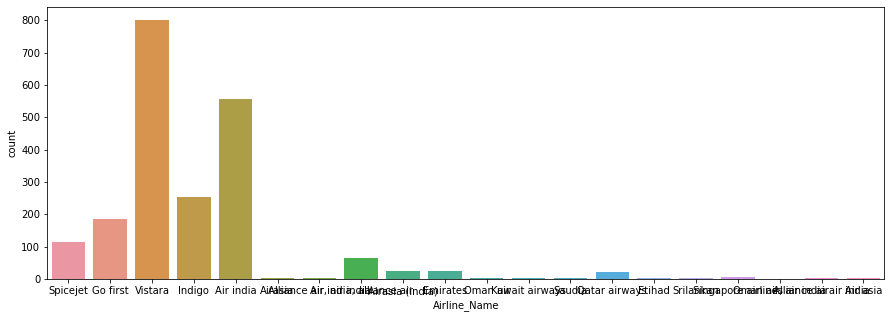

In [22]:
countplt,ax=plt.subplots(figsize=(15,5))
ax=sns.countplot(x="Airline_Name", data=Flight_price_nominal)
print(Flight_price_nominal["Airline_Name"].value_counts())

From the above countplot visualization we can say that highest number of passengers travel by Vistara followed by Air India followed by Indigo and then Go first.Rest flights have negligible number of passengers travelling by them.

Delhi    2078
Name: Source, dtype: int64


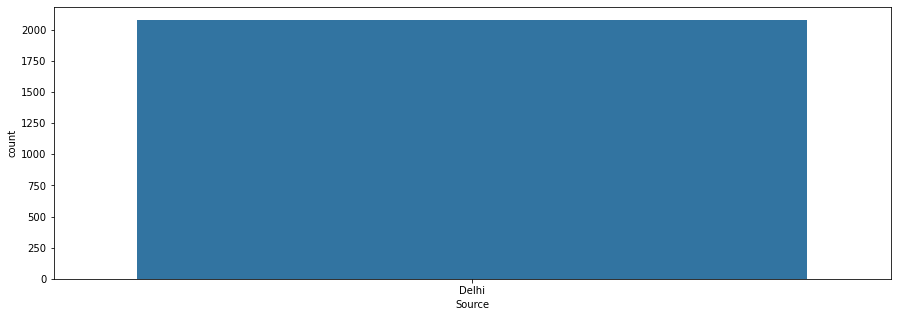

In [23]:
countplt,ax=plt.subplots(figsize=(15,5))
ax=sns.countplot(x="Source", data=Flight_price_nominal)
print(Flight_price_nominal["Source"].value_counts())

Bangalore     436
Mumbai        428
Kolkata       381
Chennai       371
Hyderabad     266
Chandigarh    165
Pune           31
Name: Destination, dtype: int64


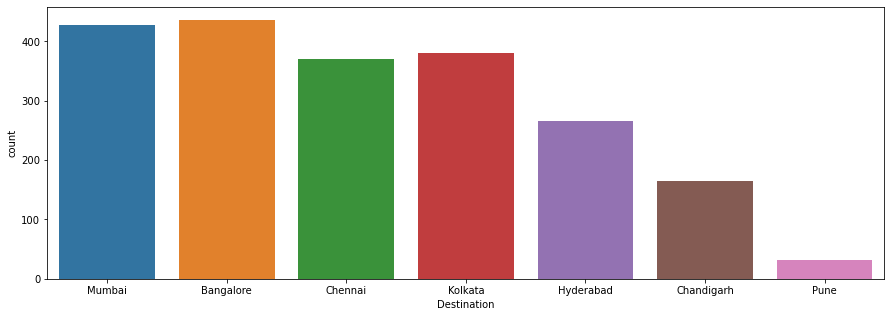

In [24]:
countplt,ax=plt.subplots(figsize=(15,5))
ax=sns.countplot(x="Destination", data=Flight_price_nominal)
print(Flight_price_nominal["Destination"].value_counts())

The maximum value of Destination is 'Bangalore' followed by 'Mumbai' followed by 'Kolkata', 'Chennai' and so on. So we can say that maximum number of passengers are travelling to These cities.

1-stop       1108
2 Stop(s)     416
1 Stop        274
Nonstop       187
2+-stop        46
Non Stop       24
3 Stop(s)      23
Name: Total_Stops, dtype: int64


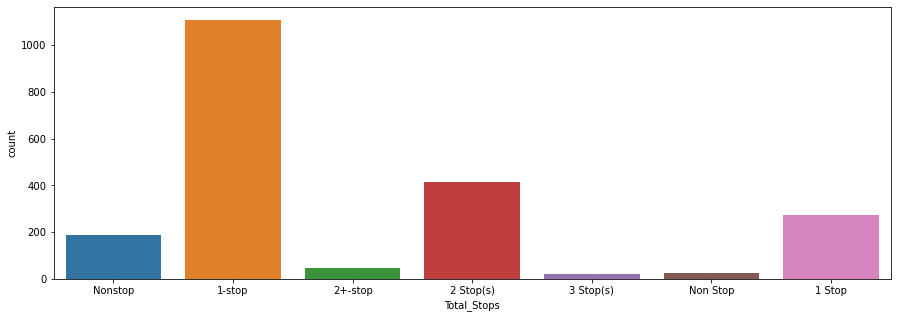

In [25]:
countplt,ax=plt.subplots(figsize=(15,5))
ax=sns.countplot(x="Total_Stops", data=Flight_price_nominal)
print(Flight_price_nominal["Total_Stops"].value_counts())

The maximum value of Total_Stops is '1-stop' followed by '2-stops' followed by '2+ stops' and others that means maximum flights have only '1-stop' in their journey.

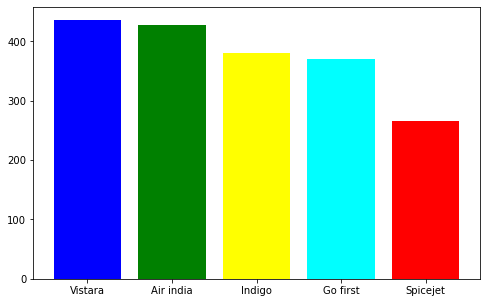

In [26]:
#making a bar-plot for the top 5 airline_name with top 5 destinations
plt.figure(figsize=(8,5))
plt.bar(list(Flight_price['Airline_Name'].value_counts()[0:5].keys()),list(Flight_price['Destination'].value_counts()[0:5]),color=['blue','green','yellow','cyan','red'])
plt.show()

From the above plot we can say that 'Vistara' is having highest number of flights for any 'Destination' followed by 'Air india' and followed by others.

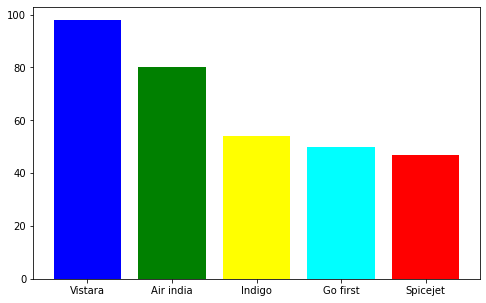

In [27]:
#making a bar-plot for the top 5 airline_name with top 5 prices
plt.figure(figsize=(8,5))
plt.bar(list(Flight_price['Airline_Name'].value_counts()[0:5].keys()),list(Flight_price['Price'].value_counts()[0:5]), color=['blue','green','yellow','cyan','red'])
plt.show()

From the above plots we can say that 'Vistara' is having the highest Price for any destination followed by 'Air india' and followed by others.

### Label Encoding String Data

In [28]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [29]:
for i in Flight_price.columns:
    if Flight_price[i].dtypes=="object":
        Flight_price[i]=enc.fit_transform(Flight_price[i].values.reshape(-1,1))

In [30]:
Flight_price

,Airline_Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
0,17.0,0.0,5.0,9.0,43.0,4.0,6.0,5955
1,17.0,0.0,5.0,140.0,313.0,4.0,6.0,5955
2,9.0,0.0,5.0,21.0,68.0,2.0,6.0,5954
3,9.0,0.0,5.0,93.0,217.0,3.0,6.0,5954
4,9.0,0.0,5.0,143.0,318.0,3.0,6.0,5954
...,...,...,...,...,...,...,...,...
2073,1.0,0.0,3.0,116.0,297.0,205.0,2.0,9840
2074,19.0,0.0,3.0,31.0,162.0,197.0,2.0,9945
2075,1.0,0.0,3.0,25.0,297.0,238.0,2.0,10474
2076,1.0,0.0,3.0,5.0,297.0,239.0,2.0,10474


### Checking the distribution of the continous value or the float type columns 

In [31]:
Flight_price_continuous=Flight_price[["Departure_Time","Arrival_Time","Duration","Price"]].copy()

In [32]:
Flight_price_continuous.columns

Index(['Departure_Time', 'Arrival_Time', 'Duration', 'Price'], dtype='object')

<AxesSubplot:xlabel='Departure_Time', ylabel='Density'>

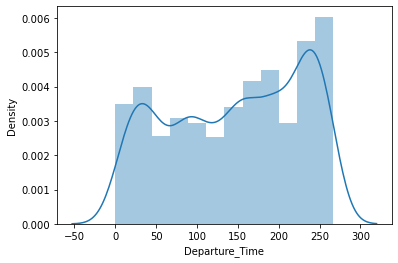

In [33]:
sns.distplot(Flight_price_continuous['Departure_Time'],kde=True)

From the Distribution Plot we can say that minimum value for the Departure Time is 0 and maximum value is 260.And the curve is looking uniform.

<AxesSubplot:xlabel='Arrival_Time', ylabel='Density'>

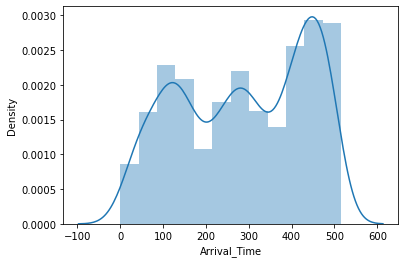

In [34]:
sns.distplot(Flight_price_continuous['Arrival_Time'],kde=True)

The minimum value for the Arrival Time is 0 and maximum value is 510 and distribution is multimodal.

<AxesSubplot:xlabel='Duration', ylabel='Density'>

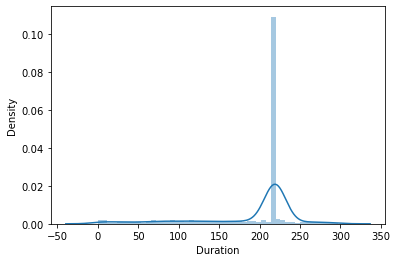

In [35]:
sns.distplot(Flight_price_continuous['Duration'],kde=True)

From the distribution plot we can say that data is having a peak at 230 and the data is negatively skewed.

<AxesSubplot:xlabel='Price', ylabel='Density'>

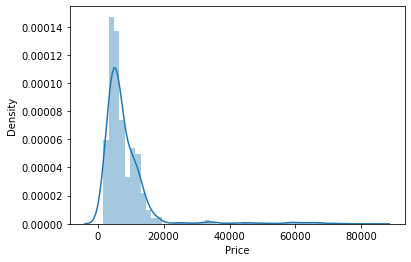

In [36]:
sns.distplot(Flight_price_continuous['Price'],kde=True)

In [37]:
Flight_price_continuous['Price'].mean()

8352.985563041386

In [38]:
Flight_price_continuous['Price'].median()

5955.0

From the flight price data we can say that minimum value is 1655 and maximum value is 82947 and Price ranges in between this value.
Mean of the Price is 8352.98 and median is 5955.0 that means 50 percent of price data lies beyond 5955.

### Outliers Check

<AxesSubplot:>

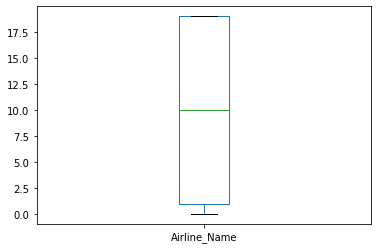

In [39]:
Flight_price['Airline_Name'].plot.box()

<AxesSubplot:>

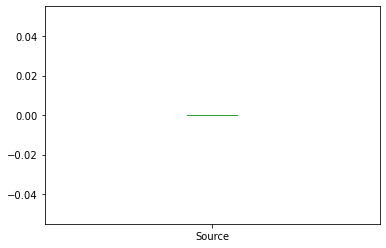

In [40]:
Flight_price['Source'].plot.box()

<AxesSubplot:>

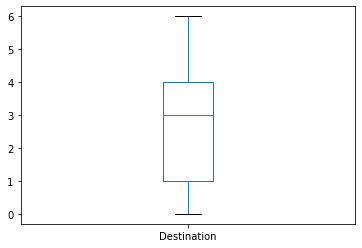

In [41]:
Flight_price['Destination'].plot.box()

<AxesSubplot:>

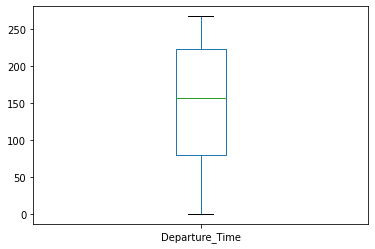

In [42]:
Flight_price['Departure_Time'].plot.box()

<AxesSubplot:>

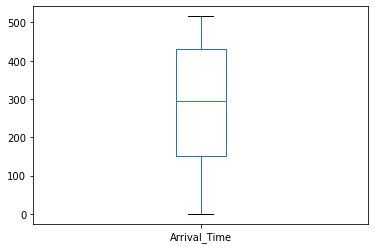

In [43]:
Flight_price['Arrival_Time'].plot.box()

<AxesSubplot:>

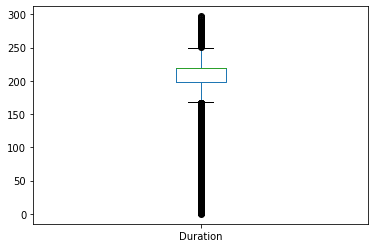

In [44]:
Flight_price['Duration'].plot.box()

<AxesSubplot:>

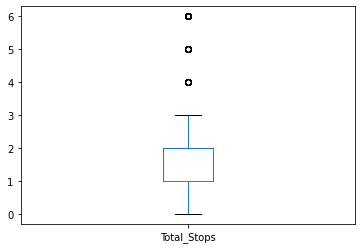

In [45]:
Flight_price['Total_Stops'].plot.box()

<AxesSubplot:>

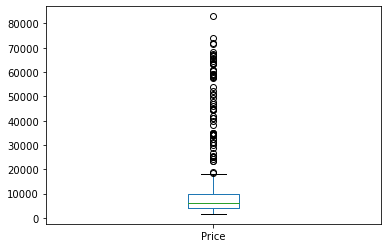

In [46]:
Flight_price['Price'].plot.box()

From the Bivariate Analysis we can say that Duration, Total_Stops and Price have some outliers present in them.

### Bivariate Analysis 

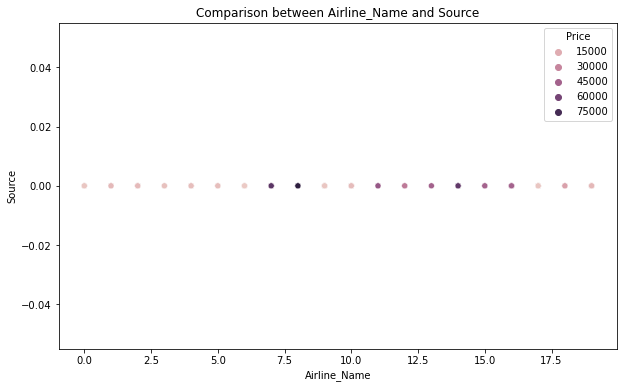

In [47]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Airline_Name and Source')
sns.scatterplot(Flight_price['Airline_Name'], Flight_price['Source'], hue=Flight_price["Price"]);

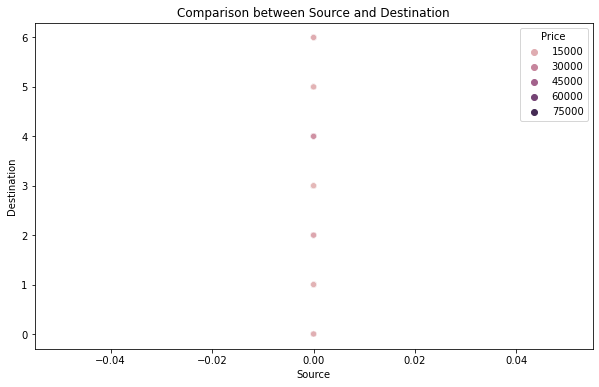

In [48]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Source and Destination')
sns.scatterplot(Flight_price['Source'], Flight_price['Destination'], hue=Flight_price["Price"]);

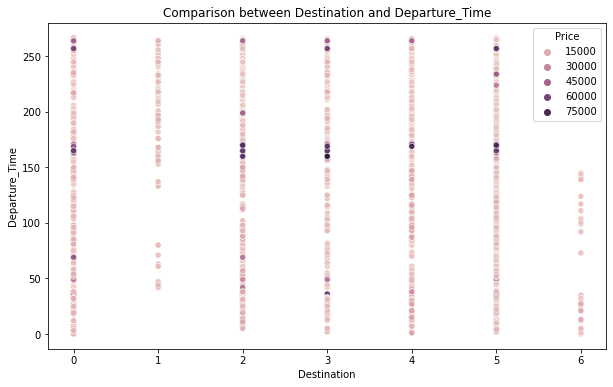

In [49]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Destination and Departure_Time')
sns.scatterplot(Flight_price['Destination'], Flight_price['Departure_Time'], hue=Flight_price["Price"]);

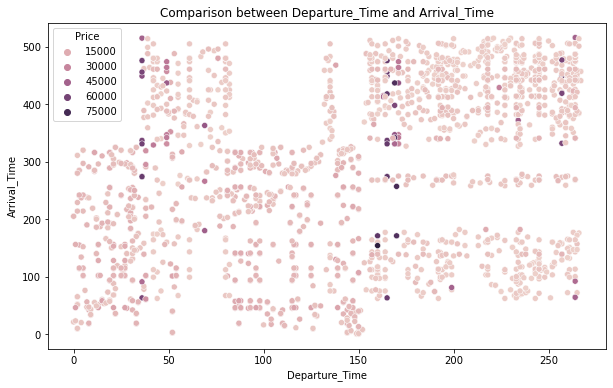

In [50]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Departure_Time and Arrival_Time')
sns.scatterplot(Flight_price['Departure_Time'], Flight_price['Arrival_Time'], hue=Flight_price["Price"]);

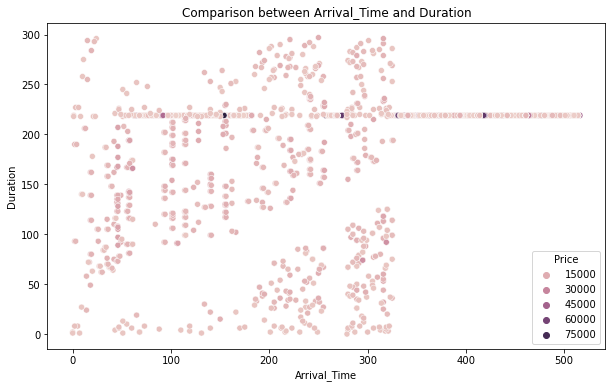

In [51]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Arrival_Time and Duration')
sns.scatterplot(Flight_price['Arrival_Time'], Flight_price['Duration'], hue=Flight_price["Price"]);

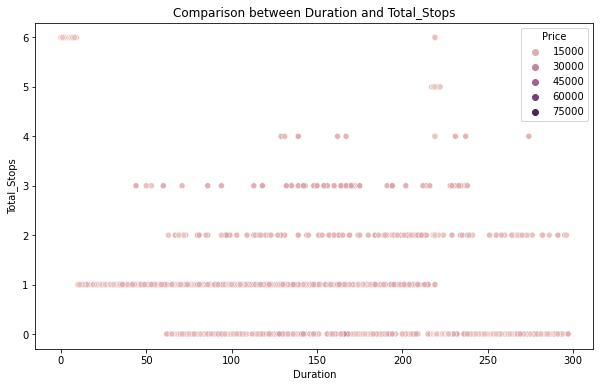

In [52]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Duration and Total_Stops')
sns.scatterplot(Flight_price['Duration'], Flight_price['Total_Stops'], hue=Flight_price["Price"]);

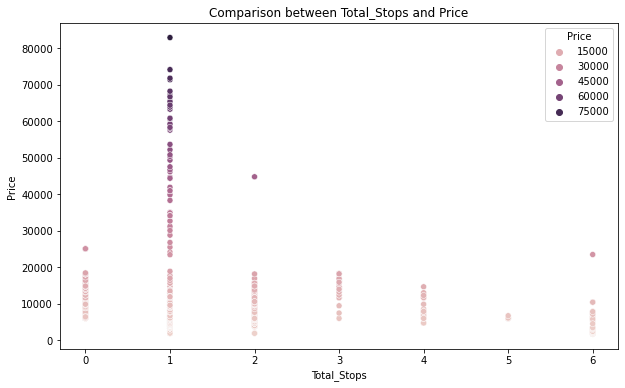

In [53]:
plt.figure(figsize=[10,6])
plt.title('Comparison between Total_Stops and Price')
sns.scatterplot(Flight_price['Total_Stops'], Flight_price['Price'], hue=Flight_price["Price"]);

From the Bivariate Analysis we can say that there is no correlation found between the features in the DataSet.

In [54]:
Flight_price.describe(percentiles=[0.20,0.25,0.40,0.50,0.60,0.75,0.80]).transpose()

,count,mean,std,min,20%,25%,40%,50%,60%,75%,80%,max
Airline_Name,2078.0,11.025987,7.609214,0.0,1.0,1.00,9.0,10.0,17.0,19.00,19.0,19.0
Source,2078.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
Destination,2078.0,2.673244,1.849558,0.0,0.0,1.00,2.0,3.0,4.0,4.00,5.0,6.0
Departure_Time,2078.0,147.131376,80.905805,0.0,55.0,80.00,125.0,157.0,184.2,223.00,233.0,267.0
Arrival_Time,2078.0,289.274302,148.972468,0.0,126.0,152.25,251.0,295.5,361.2,429.75,443.0,516.0
Duration,2078.0,191.671800,60.942691,0.0,160.4,198.25,219.0,219.0,219.0,219.00,219.0,297.0
Total_Stops,2078.0,1.641963,1.594952,0.0,1.0,1.00,1.0,1.0,1.0,2.00,2.0,6.0
Price,2078.0,8352.985563,8564.742587,1655.0,3975.0,4160.00,5550.0,5955.0,7375.0,9840.00,10680.0,82947.0


Mean is higher than median in Airline_Name,Total_Stops,Price, so the data is positively skewed in these columns that means maximum data lies to the left of the distribution curve.

Small gap can be found between 75 percentile and max in Destination,Departure_Time,Arrival_Time,Duration,so some outliers are present in these columns.

Large gap can be found between 75 percentile and max in Price, Total_Stops so more number of outliers are present in these columns.

### multivariate analysis

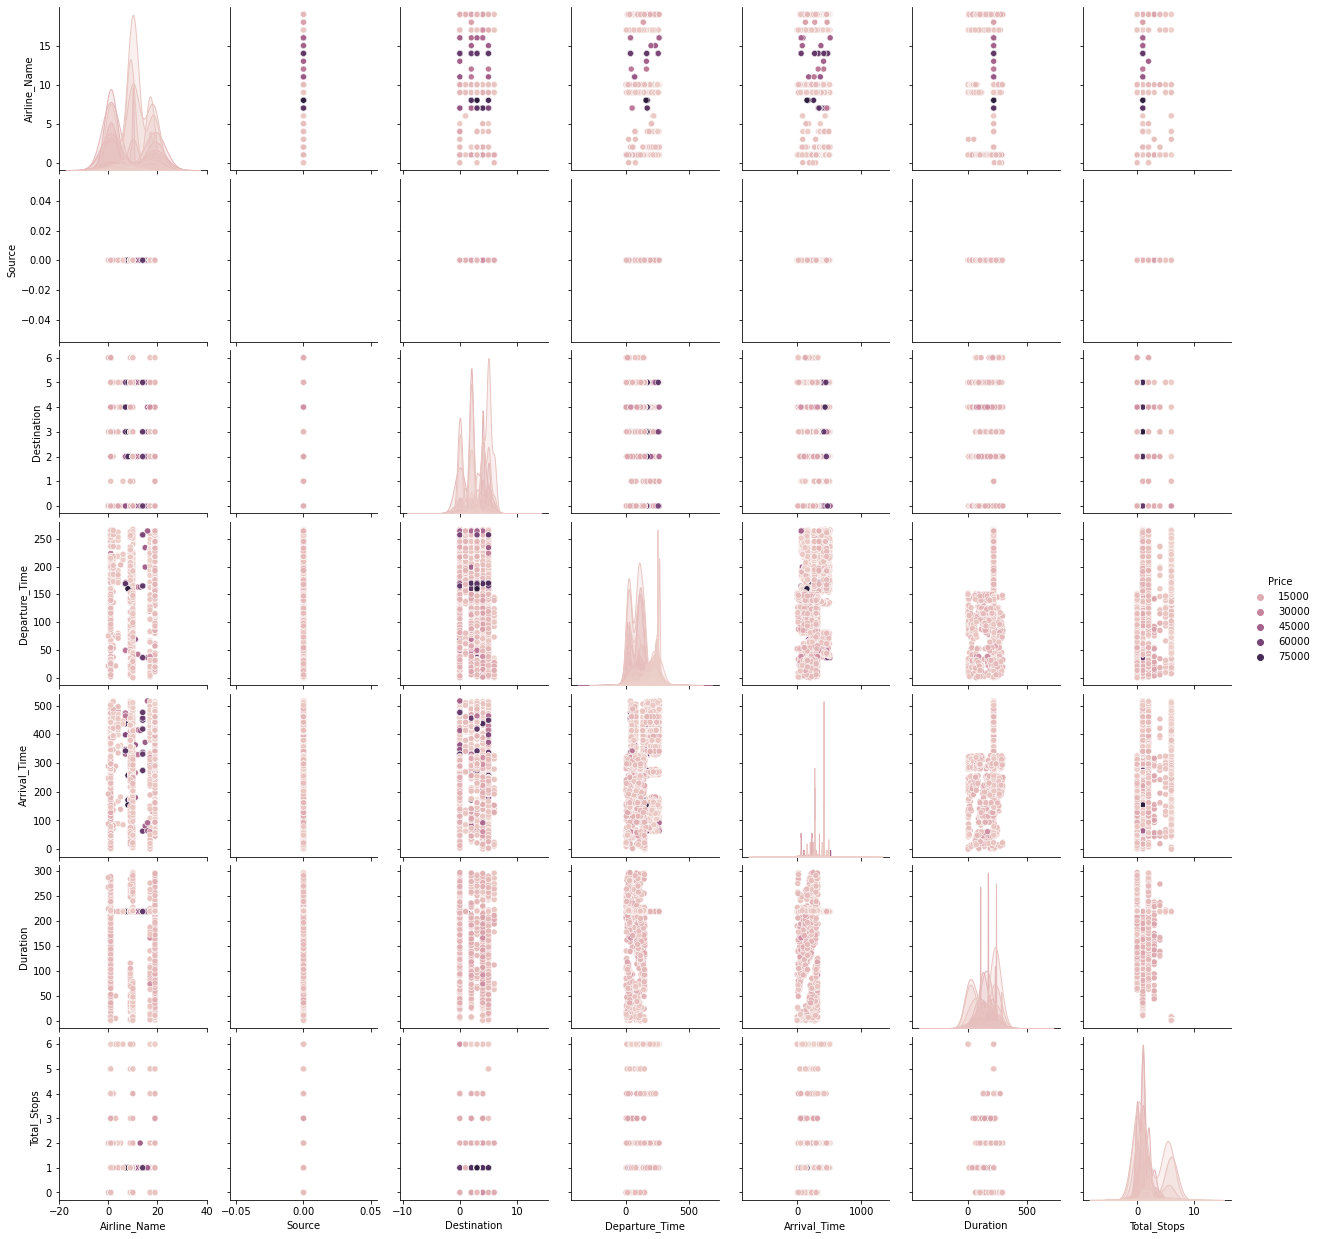

In [55]:
sns.pairplot(Flight_price,hue="Price")  

In [56]:
cor=Flight_price.corr()
cor

,Airline_Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
Airline_Name,1.000000,NaN,-0.164563,0.137682,0.192032,0.070985,0.021515,-0.037031
Source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,-0.164563,NaN,1.000000,-0.103400,-0.075838,-0.077287,0.004389,-0.007582
Departure_Time,0.137682,NaN,-0.103400,1.000000,0.368623,0.375343,0.127427,-0.205619
Arrival_Time,0.192032,NaN,-0.075838,0.368623,1.000000,0.322250,0.025643,-0.110688
Duration,0.070985,NaN,-0.077287,0.375343,0.322250,1.000000,-0.082964,-0.083820
Total_Stops,0.021515,NaN,0.004389,0.127427,0.025643,-0.082964,1.000000,-0.156872
Price,-0.037031,NaN,-0.007582,-0.205619,-0.110688,-0.083820,-0.156872,1.000000


<AxesSubplot:>

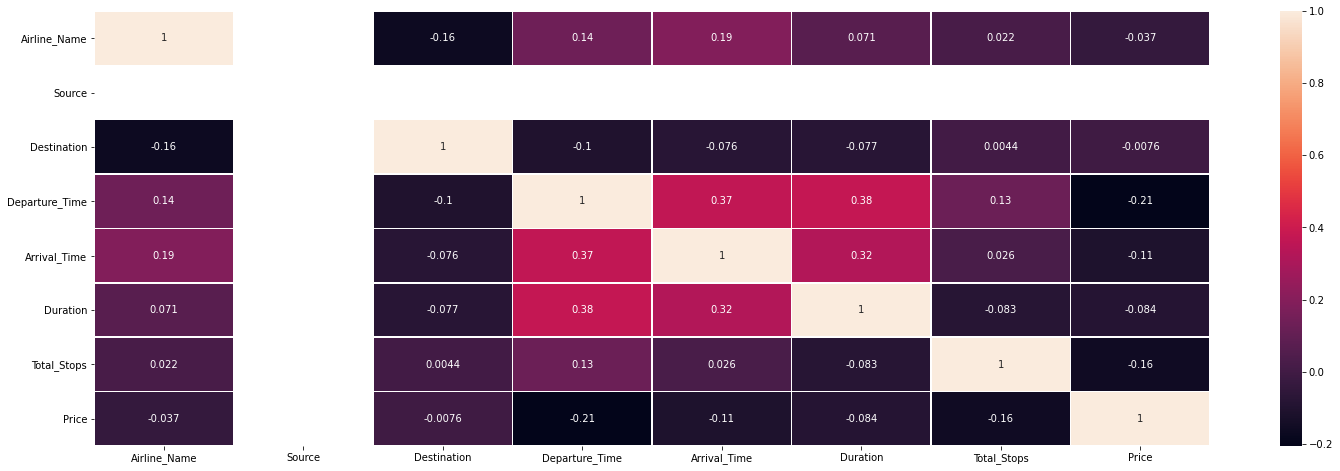

In [57]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(25,8))        
sns.heatmap(cor, annot=True, linewidths=.5, ax=ax)

From the heatmap we can say that none of the features is having significant value of correlation coefficient.

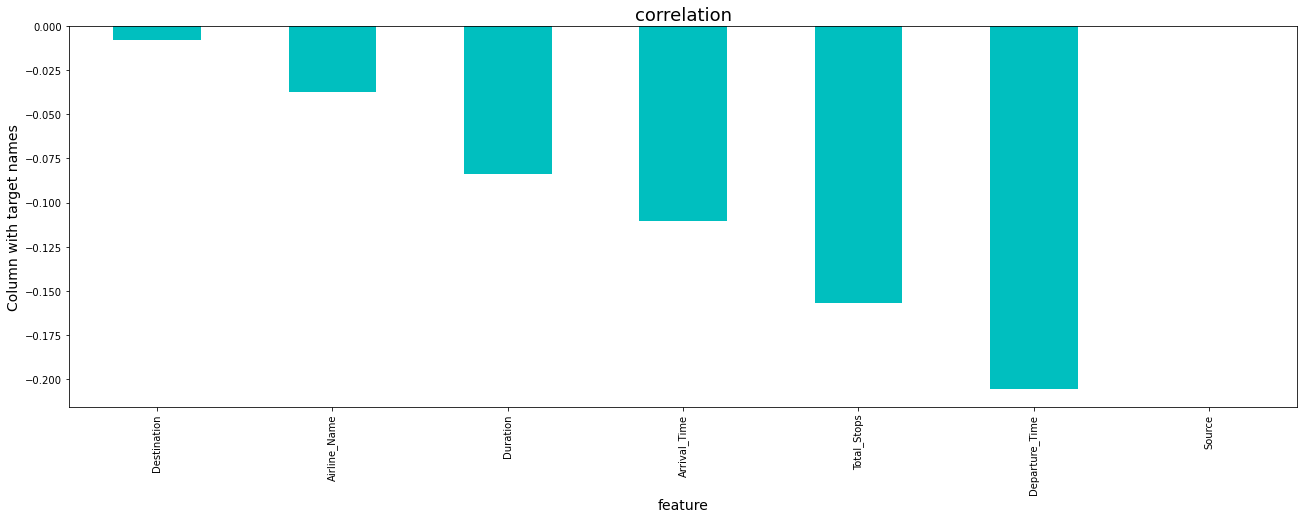

In [58]:
plt.figure(figsize=(22,7))
cor['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### Considering the outlier removal

In [59]:
#removing the outliers
from scipy.stats import zscore
z=np.abs(zscore(Flight_price))
z

array([[0.78529151,        nan, 1.25830992, ..., 3.08022125, 2.73305154,
        0.28005077],
       [0.78529151,        nan, 1.25830992, ..., 3.08022125, 2.73305154,
        0.28005077],
       [0.26631845,        nan, 1.25830992, ..., 3.11304686, 2.73305154,
        0.28016756],
       ...,
       [1.31792842,        nan, 0.17670991, ..., 0.76037586, 0.22453515,
        0.24770446],
       [1.31792842,        nan, 0.17670991, ..., 0.77678867, 0.22453515,
        0.24770446],
       [1.048194  ,        nan, 0.17670991, ..., 1.45535324, 0.22453515,
        0.25949983]])

In [60]:
threshold=3
print(np.where(z>3))

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   29,   31,   35,  114,  115,
        116,  117,  118,  119,  120,  121,  123,  124,  125,  126,  127,
        128,  204,  205,  206,  207,  208,  209,  210,  211,  212,  213,
        214,  281,  282,  283,  577,  578,  579,  580,  581,  582,  583,
        584,  585,  586,  587,  588,  589,  590,  591,  804,  805,  806,
        807,  808,  809,  810,  811,  812,  813,  814, 1058, 1059, 1060,
       1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1277,
       1278, 1279, 1280, 1281, 1491, 1492, 1493, 1494, 1495, 1496, 1497,
       1498, 1499, 1500, 1501], dtype=int64), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
    

In [61]:
Flight_price_new=Flight_price[(z<3).all(axis=1)]
Flight_price_new

,Airline_Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price


We will use the original dataset for our further operations.

### Skewness Checking and Removal

In [63]:
Flight_price.skew()

Airline_Name     -0.214324
Source            0.000000
Destination      -0.135852
Departure_Time   -0.216854
Arrival_Time     -0.212769
Duration         -1.686798
Total_Stops       1.819283
Price             4.706372
dtype: float64

Negative skewness is present in the following features:

Duration with value=-1.686798

and positive skewness is present in the following features:

Total_Stops with value=+1.819283

Price with value=+4.706372

In [64]:
xnew=Flight_price.drop('Price', axis=1)
ynew=Flight_price['Price']

In [65]:
from sklearn.preprocessing import power_transform
x_new=power_transform(xnew, method='yeo-johnson')
x_new

array([[ 0.79589465,  0.        ,  1.21519491, ..., -1.73131626,
        -2.20654886,  1.97742991],
       [ 0.79589465,  0.        ,  1.21519491, ...,  0.19797124,
        -2.20654886,  1.97742991],
       [-0.11445889,  0.        ,  1.21519491, ..., -1.52378804,
        -2.20693583,  1.97742991],
       ...,
       [-1.38481437,  0.        ,  0.22611262, ...,  0.0943713 ,
         0.95085886,  0.60091735],
       [-1.38481437,  0.        ,  0.22611262, ...,  0.0943713 ,
         0.9803924 ,  0.60091735],
       [ 0.99904379,  0.        ,  0.22611262, ..., -0.81896845,
        -1.7130557 ,  0.60091735]])

In [66]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x_scaled=SC.fit_transform(x_new)
x_scaled

array([[ 0.79589465,  0.        ,  1.21519491, ..., -1.73131626,
        -2.20654886,  1.97742991],
       [ 0.79589465,  0.        ,  1.21519491, ...,  0.19797124,
        -2.20654886,  1.97742991],
       [-0.11445889,  0.        ,  1.21519491, ..., -1.52378804,
        -2.20693583,  1.97742991],
       ...,
       [-1.38481437,  0.        ,  0.22611262, ...,  0.0943713 ,
         0.95085886,  0.60091735],
       [-1.38481437,  0.        ,  0.22611262, ...,  0.0943713 ,
         0.9803924 ,  0.60091735],
       [ 0.99904379,  0.        ,  0.22611262, ..., -0.81896845,
        -1.7130557 ,  0.60091735]])

In [67]:
Flight_price_scaled=pd.DataFrame(x_scaled)
Flight_price_scaled

,0,1,2,3,4,5,6
0,0.795895,0.0,1.215195,-1.844776,-1.731316,-2.206549,1.977430
1,0.795895,0.0,1.215195,-0.026317,0.197971,-2.206549,1.977430
2,-0.114459,0.0,1.215195,-1.632342,-1.523788,-2.206936,1.977430
3,-0.114459,0.0,1.215195,-0.607890,-0.437067,-2.206772,1.977430
4,-0.114459,0.0,1.215195,0.009503,0.230186,-2.206772,1.977430
...,...,...,...,...,...,...,...
2073,-1.384814,0.0,0.226113,-0.318078,0.094371,0.060365,0.600917
2074,0.999044,0.0,0.226113,-1.471670,-0.818968,-0.131278,0.600917
2075,-1.384814,0.0,0.226113,-1.566777,0.094371,0.950859,0.600917
2076,-1.384814,0.0,0.226113,-1.924639,0.094371,0.980392,0.600917


In [68]:
Flight_price_scaled.rename(columns = {0:'Airline_Name', 1:'Source',
                              2:'Destination',3:'Departure_Time',4:'Arrival_Time',5:'Duration',6:'Total_Stops'}, inplace = True)
Flight_price_scaled

,Airline_Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops
0,0.795895,0.0,1.215195,-1.844776,-1.731316,-2.206549,1.977430
1,0.795895,0.0,1.215195,-0.026317,0.197971,-2.206549,1.977430
2,-0.114459,0.0,1.215195,-1.632342,-1.523788,-2.206936,1.977430
3,-0.114459,0.0,1.215195,-0.607890,-0.437067,-2.206772,1.977430
4,-0.114459,0.0,1.215195,0.009503,0.230186,-2.206772,1.977430
...,...,...,...,...,...,...,...
2073,-1.384814,0.0,0.226113,-0.318078,0.094371,0.060365,0.600917
2074,0.999044,0.0,0.226113,-1.471670,-0.818968,-0.131278,0.600917
2075,-1.384814,0.0,0.226113,-1.566777,0.094371,0.950859,0.600917
2076,-1.384814,0.0,0.226113,-1.924639,0.094371,0.980392,0.600917


### VIF for removing multicollinearity problem

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
def calculate_vif(a):
    vif=pd.DataFrame()
    vif["variables"]=a.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(a.values,i) for i in range(a.shape[1])]
    return(vif)

In [71]:
calculate_vif(Flight_price_scaled)

,variables,VIF FACTOR
0,Airline_Name,1.064496
1,Source,NaN
2,Destination,1.033129
3,Departure_Time,1.304323
4,Arrival_Time,1.248239
5,Duration,1.205569
6,Total_Stops,1.078212


Multicollinearity doesn't exist between features. VIF factor for all the features is low that is below 5 so we will include all the features for building model.

In [72]:
xtrain=Flight_price_scaled
ytrain=ynew

## train_test_split

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [74]:
for i in range(200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.33, random_state=i)
    dtr=DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred=dtr.predict(x_test)
    
    print("r2score at random state",i,"is",r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error :', mean_absolute_error(y_test,pred))
    print('Mean squared error :', mean_squared_error(y_test,pred))
    print('Root mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred)))

r2score at random state 0 is 0.7099079377203485
error:
Mean absolute error : 1664.737609329446
Mean squared error : 19653349.33600583
Root mean Squared Error : 4433.209823142351
r2score at random state 1 is 0.43423345735306207
error:
Mean absolute error : 1936.0956268221576
Mean squared error : 35459474.37431487
Root mean Squared Error : 5954.78583782111
r2score at random state 2 is 0.6076267363256447
error:
Mean absolute error : 1588.5643828960156
Mean squared error : 19201301.213111434
Root mean Squared Error : 4381.928937478498
r2score at random state 3 is 0.1922826778040393
error:
Mean absolute error : 1996.103498542274
Mean squared error : 44885525.4803207
Root mean Squared Error : 6699.666072299477
r2score at random state 4 is 0.5159755808041139
error:
Mean absolute error : 1638.75306122449
Mean squared error : 28244183.945014574
Root mean Squared Error : 5314.525749774346
r2score at random state 5 is 0.8134363774614752
error:
Mean absolute error : 1399.2463556851312
Mean squared

In [75]:
from sklearn.tree import DecisionTreeRegressor
maxr2=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.30, random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxRS=i
print("Best r2_score is ", maxr2, "on Random_state", maxRS)

Best r2_score is  0.874365021353407 on Random_state 105


In [76]:
x_train, x_test, y_train, y_test=train_test_split(xtrain,ytrain,test_size=0.30, random_state=105)

### Now checking for r2_score using 5 algorithms

In [77]:
from sklearn.svm import SVR
SV=SVR(kernel="linear")
SV.fit(x_train,y_train)
print(SV.score(x_train,y_train))
pred=SV.predict(x_test)
print(r2_score(y_test,pred))

-0.04034985809972502
-0.017398451320010277


In [78]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(max_depth=2, random_state=0)
RFReg.fit(x_train, y_train)
pred=(RFReg.predict(x_test))
print(RFReg.score(x_train,y_train))
print(r2_score(y_test,pred))

0.20900561508977422
0.3319895751640083


In [79]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print(DTR.score(x_train,y_train))
print(r2_score(y_test,pred))

0.9999419098439891
0.8440821448955751


In [81]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
#enr=ElasticNet()
enr.fit(x_train,y_train)
Enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
print(r2_score(y_test,pred))
enr.coef_

0.051124417343701434
0.8440821448955751


array([  161.5428045 ,     0.        ,   -41.29606355, -1363.09898899,
        -327.13438427,  -336.755975  ,  -810.60773443])

In [83]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train, y_train)
Neigh=neigh.predict(x_test)
print(neigh.score(x_train,y_train))
print(r2_score(y_test,pred))

0.7472881183975969
0.8440821448955751


### Now checking cross_validation_score


In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(SV,xtrain,ytrain,cv=6)
print(score)
print(score.mean())
print(score.std())

[-1.73562750e+00  1.26396452e-02  1.48595735e-03 -1.43825611e-02
 -1.04509546e-01 -1.21972077e+00]
-0.5100191295458035
0.7012721273003286


In [86]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFReg,xtrain,ytrain,cv=6)
print(score)
print(score.mean())
print(score.std())

[-0.10279832  0.20818809 -0.91990251  0.17830208  0.11049992 -0.09837571]
-0.10401441005723587
0.3849017333057339


In [87]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(DTR,xtrain,ytrain,cv=6)
print(score)
print(score.mean())
print(score.std())

[ 0.11450464  0.2645266  -2.75342232 -0.18095685  0.57442851 -1.39022139]
-0.5618568036687273
1.1594359773973384


In [89]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(enr,xtrain,ytrain,cv=6)
print(score)
print(score.mean())
print(score.std())

[-0.23402444  0.02614166 -0.06750463  0.01011175 -0.02915214 -0.42515363]
-0.11993024118895866
0.160942965799707


In [90]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(neigh,xtrain,ytrain,cv=6)
print(score)
print(score.mean())
print(score.std())

[-0.78740217 -0.54903383 -2.89834244 -0.43170754  0.01233128 -2.98637071]
-1.2734209031391217
1.2039627603668355


We will choose DecisionTreeRegressor as our best model.

### Hyper parameter tuning


In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
parameter = {'random_state':np.arange(1,9),
            'max_depth':np.arange(1,6), 
            'min_samples_split':np.arange(1,7),
            'min_samples_leaf' :np.arange(3,7)}

In [93]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=6)

In [94]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5]),
                         'min_samples_leaf': array([3, 4, 5, 6]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6]),
                         'random_state': array([1, 2, 3, 4, 5, 6, 7, 8])})

In [ ]:
GCV.best_params_

In [ ]:
Final_model= DecisionTreeRegressor(max_depth = 5,min_samples_leaf=3, min_samples_split = 2, random_state = 3)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2score*100)

## Saving the Model

In [ ]:
import joblib
joblib.dump(Final_model,"Fliprobo_Flight_price.pkl")

## Conclusion

In [ ]:
import numpy as np
a=np.array(y_test)
predicted=np.array(pred)
predicted = predicted.astype(int)
Flight_Price_Final=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
Flight_Price_Final